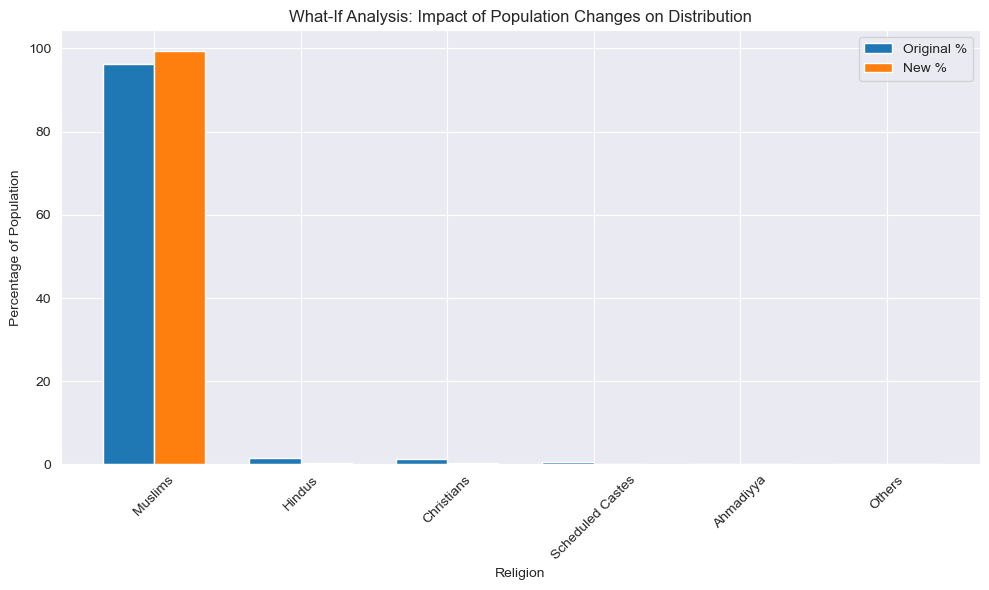

   Unnamed: 0          Religion  Population  New Population  Original %  \
0           0           Muslims   231686709    1.390120e+09   96.352221   
1           1            Hindus     3867729    3.790374e+06    1.608484   
2           2        Christians     3300788    3.399812e+06    1.372708   
3           3  Scheduled Castes     1349487    1.362982e+06    0.561215   
4           4         Ahmadiyya      162684    1.626840e+05    0.067656   
5           5            Others       90692    9.976120e+04    0.037716   

       New %  
0  99.369834  
1   0.270947  
2   0.243028  
3   0.097430  
4   0.011629  
5   0.007131  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Input your dataset
data = pd.DataFrame(pd.read_csv("archive/Religion_Population_Distribution.csv"))

# Define a scenario: Simulate population growth/decline (in percentages)
growth_rates = {
    'Muslims': 5.0,  # 5% growth
    'Hindus': -0.02,  # 2% decline
    'Christians': 0.03,  # 3% growth
    'Scheduled Castes': 0.01,  # 1% growth
    'Ahmadiyya': 0.0,  # No change
    'Others': 0.10  # 10% growth
}

# Apply the growth rates to calculate new populations
data['New Population'] = data.apply(lambda row: row['Population'] * (1 + growth_rates[row['Religion']]), axis=1)

# Calculate percentage distributions
data['Original %'] = data['Population'] / data['Population'].sum() * 100
data['New %'] = data['New Population'] / data['New Population'].sum() * 100

# Visualize the changes
plt.figure(figsize=(10, 6))
width = 0.35  # Bar width
x = range(len(data))  # X positions

# Bar plot: Original vs New Population
plt.bar(x, data['Original %'], width, label='Original %')
plt.bar([i + width for i in x], data['New %'], width, label='New %')

plt.xlabel('Religion')
plt.ylabel('Percentage of Population')
plt.title('What-If Analysis: Impact of Population Changes on Distribution')
plt.xticks([i + width / 2 for i in x], data['Religion'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Print the data for reference
print(data)


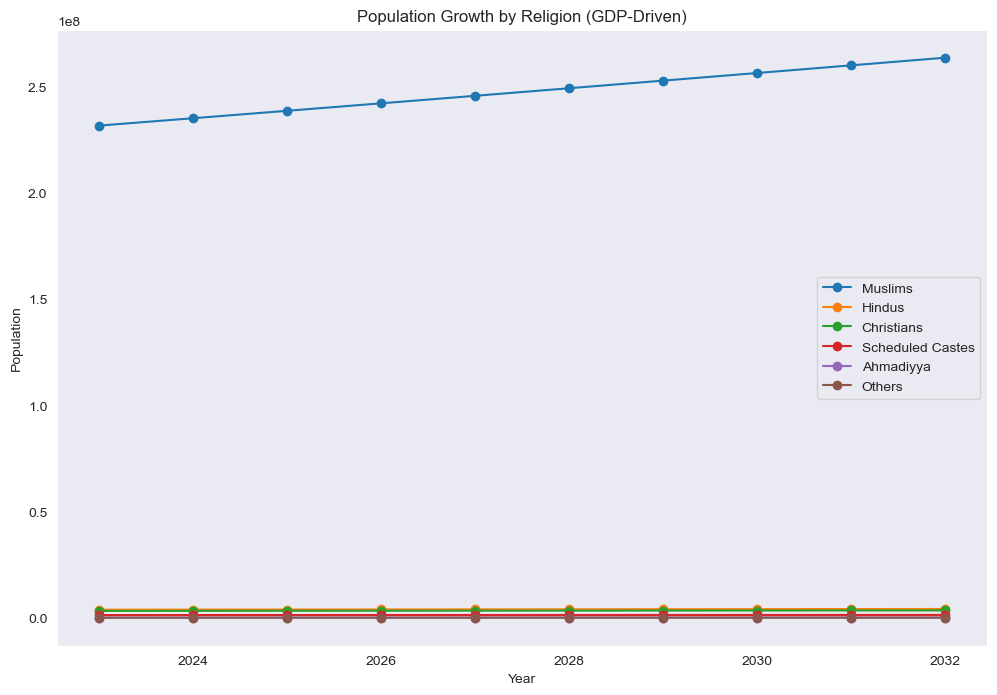

   Year       Muslims        Hindus    Christians  Scheduled Castes  \
0  2023  2.316867e+08  3.867729e+06  3.300788e+06      1.349487e+06   
1  2024  2.351504e+08  3.906213e+06  3.327029e+06      1.356167e+06   
2  2025  2.386412e+08  3.944670e+06  3.353130e+06      1.362738e+06   
3  2026  2.421569e+08  3.983060e+06  3.379057e+06      1.369186e+06   
4  2027  2.456951e+08  4.021340e+06  3.404774e+06      1.375499e+06   
5  2028  2.492529e+08  4.059465e+06  3.430244e+06      1.381663e+06   
6  2029  2.528274e+08  4.097384e+06  3.455425e+06      1.387660e+06   
7  2030  2.564153e+08  4.135043e+06  3.480273e+06      1.393476e+06   
8  2031  2.600128e+08  4.172383e+06  3.504740e+06      1.399092e+06   
9  2032  2.636160e+08  4.209342e+06  3.528775e+06      1.404489e+06   

       Ahmadiyya         Others  Total Population  
0  162684.000000   90692.000000      2.404581e+08  
1  165929.545800   93408.225400      2.439992e+08  
2  169222.418085   96195.994137      2.475672e+08  
3  172561.

In [6]:
#GDP Growth Impact:
#GDP grows at a steady rate (5% annually).
#Population growth rates decline as GDP increases (representing improved education, healthcare, etc.).
#Population Forecast: Forecasts population sizes for each religious group over 10 years.
#Adjusts growth rates dynamically based on GDP growth.
#Visualization: Shows how GDP growth influences the population of each religious group.


import pandas as pd
import matplotlib.pyplot as plt

# Initial GDP and growth rate
initial_gdp = 350  # in billion USD
gdp_growth_rate = 0.05  # 5% annual growth

# Initial population data by religion
data = pd.DataFrame(pd.read_csv("archive/Religion_Population_Distribution.csv"))


# Define initial population growth rates (per religion)
# These rates are assumed to decrease as GDP increases
initial_growth_rates = {
    'Muslims': 0.015,  # 1.5% annual growth
    'Hindus': 0.01,    # 1.0% annual growth
    'Christians': 0.008, # 0.8% annual growth
    'Scheduled Castes': 0.005, # 0.5% annual growth
    'Ahmadiyya': 0.02, # 2.0% annual growth
    'Others': 0.03    # 3.0% annual growth
}

# Simulate for 10 years
years = range(2023, 2033)
gdp_forecast = [initial_gdp * (1 + gdp_growth_rate)**(year - 2023) for year in years]

# Adjust population growth rates based on GDP growth
adjusted_population_growth_rates = {
    religion: [rate - 0.001 * (gdp - initial_gdp) / initial_gdp for gdp in gdp_forecast]
    for religion, rate in initial_growth_rates.items()
}

# Forecast population by religion
population_forecast = {
    religion: [
        data.loc[data['Religion'] == religion, 'Population'].values[0] * (1 + growth_rate)**(year - 2023)
        for growth_rate, year in zip(adjusted_population_growth_rates[religion], years)
    ]
    for religion in data['Religion']
}

# Combine into a DataFrame
population_data = pd.DataFrame({'Year': years})
for religion, values in population_forecast.items():
    population_data[religion] = values

# Total population per year
population_data['Total Population'] = population_data.iloc[:, 1:].sum(axis=1)

# Plot results
plt.figure(figsize=(12, 8))
for religion in data['Religion']:
    plt.plot(population_data['Year'], population_data[religion], marker='o', label=f'{religion}')
plt.title('Population Growth by Religion (GDP-Driven)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.show()

# Print the data for reference
print(population_data)


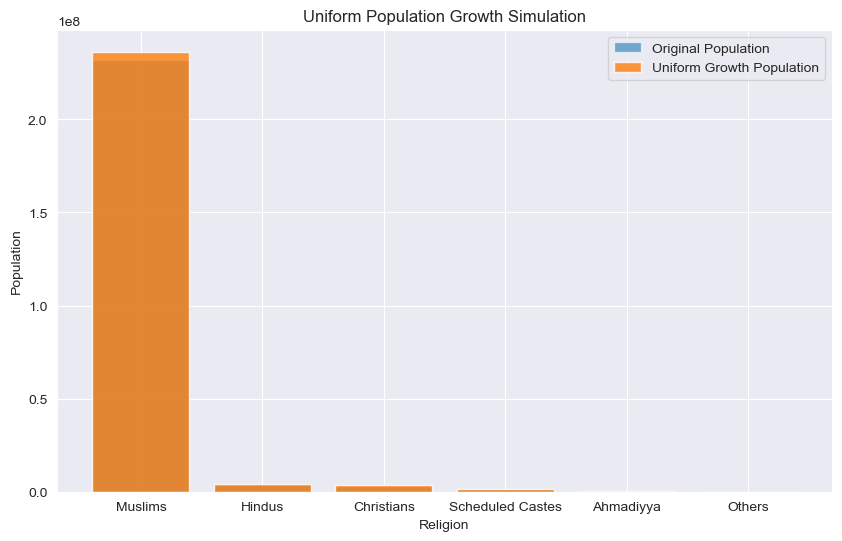

In [2]:
#Uniform Population Growth  
#Scenario: Simulate a uniform growth rate for all religions (e.g., 2% annual growth).
#Goal: Analyze how population distribution changes while maintaining relative proportions.

# Uniform growth rate
uniform_growth_rate = 0.02  # 2%

# Apply uniform growth
data['Uniform Growth Population'] = data['Population'] * (1 + uniform_growth_rate)

# Calculate new percentages
data['Uniform Growth %'] = data['Uniform Growth Population'] / data['Uniform Growth Population'].sum() * 100

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(data['Religion'], data['Population'], alpha=0.6, label='Original Population')
plt.bar(data['Religion'], data['Uniform Growth Population'], alpha=0.8, label='Uniform Growth Population')
plt.xlabel('Religion')
plt.ylabel('Population')
plt.title('Uniform Population Growth Simulation')
plt.legend()
plt.show()


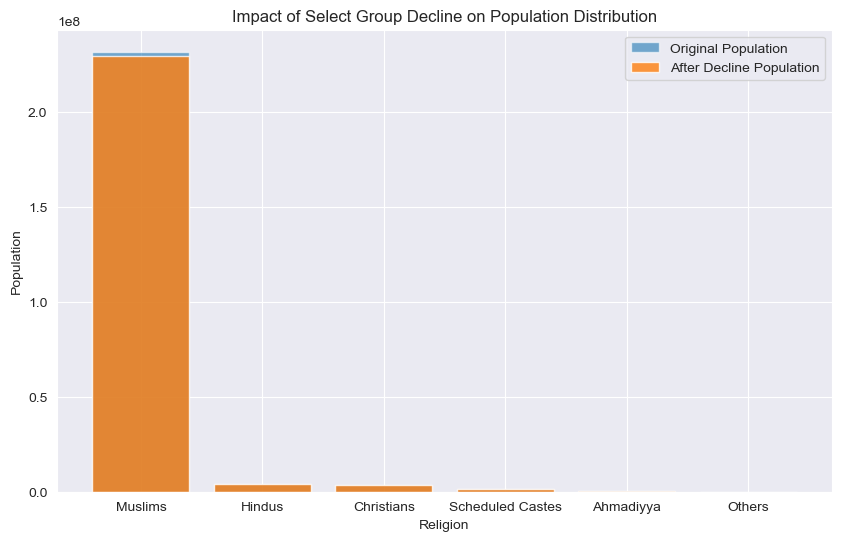

In [3]:
#Population Decline in Select Groups
#Scenario: Simulate a decline in certain groups while others grow or remain stable.
#Goal: Explore how a decrease in one group's population impacts overall distribution.

# Decline scenario
decline_rates = {
    'Muslims': -0.01,  # 1% decline
    'Hindus': 0.02,    # 2% growth
    'Christians': 0.0, # No change
    'Scheduled Castes': -0.02, # 2% decline
    'Ahmadiyya': 0.05, # 5% growth
    'Others': 0.0      # No change
}

# Apply the decline rates
data['Decline Population'] = data.apply(lambda row: row['Population'] * (1 + decline_rates[row['Religion']]), axis=1)

# Calculate new percentages
data['Decline %'] = data['Decline Population'] / data['Decline Population'].sum() * 100

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(data['Religion'], data['Population'], alpha=0.6, label='Original Population')
plt.bar(data['Religion'], data['Decline Population'], alpha=0.8, label='After Decline Population')
plt.xlabel('Religion')
plt.ylabel('Population')
plt.title('Impact of Select Group Decline on Population Distribution')
plt.legend()
plt.show()


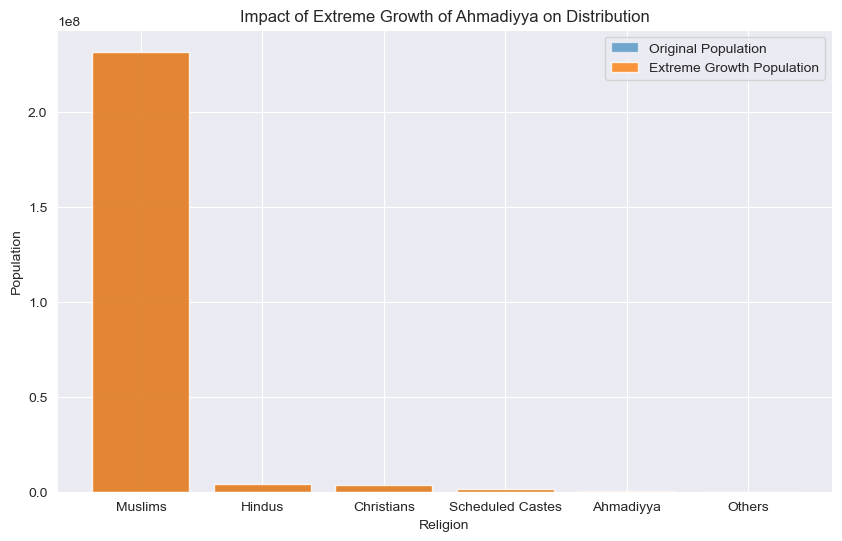

In [4]:
# Extreme Growth of a Minority Group
#Scenario: Simulate what happens if a minority group experiences a sudden population boom (e.g., 50% increase).
#Goal: Understand how the balance shifts in extreme scenarios.

# Extreme growth scenario
data['Extreme Growth Population'] = data['Population']
data.loc[data['Religion'] == 'Ahmadiyya', 'Extreme Growth Population'] *= 1.5  # 50% growth for Ahmadiyya

# Calculate new percentages
data['Extreme Growth %'] = data['Extreme Growth Population'] / data['Extreme Growth Population'].sum() * 100

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(data['Religion'], data['Population'], alpha=0.6, label='Original Population')
plt.bar(data['Religion'], data['Extreme Growth Population'], alpha=0.8, label='Extreme Growth Population')
plt.xlabel('Religion')
plt.ylabel('Population')
plt.title('Impact of Extreme Growth of Ahmadiyya on Distribution')
plt.legend()
plt.show()


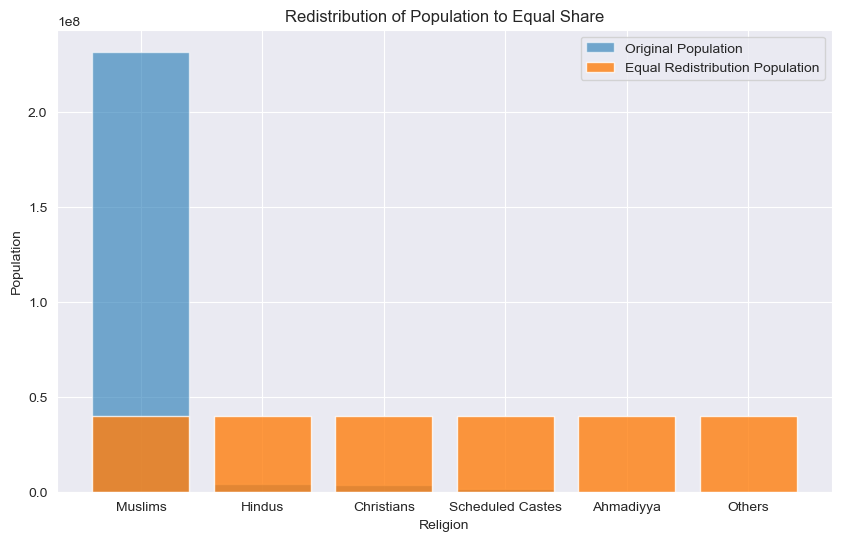

In [5]:
#Redistribution Scenario
#Scenario: Redistribute population evenly among all religions (e.g., assume equal population share).
#Goal: Compare current distribution with an equal distribution scenario.

# Redistribution scenario
equal_population = data['Population'].sum() / len(data)
data['Equal Population'] = equal_population

# Calculate percentages
data['Equal %'] = data['Equal Population'] / data['Equal Population'].sum() * 100

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(data['Religion'], data['Population'], alpha=0.6, label='Original Population')
plt.bar(data['Religion'], data['Equal Population'], alpha=0.8, label='Equal Redistribution Population')
plt.xlabel('Religion')
plt.ylabel('Population')
plt.title('Redistribution of Population to Equal Share')
plt.legend()
plt.show()
